# Assignment 3 - Exercise and Concept questions (ISLP, pp. 283-286)

In [18]:
__author__ = "Will Hinton"
__email__ = "willhint@gmail.com"
__website__ = "whinton0.github.com/py"

# <font color='blue'>Conceptual Question (Chapter 6, number 1. ISLP, p. 283) </font>
## __Q1__. "We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain p+1 models containing 0,1,2,...,p predictors. Explain your answers. ". (James et al., 2023)   

## (a) Which of the three models with k predictors has the smallest training RSS? 
Answer:
- <mark>Best subset selection has the smallest training RSS for each k.</mark> 

Justification:
- Best subset selection considers all possible combinations of k predictors from the p total, and selects the model that minimizes training RSS from among them. Forward and backward stepwise selection use greedy algorithms that add or remove one predictor at a time, which may not explore all combinations and therefore may miss the optimal k-predictor model. Thus, best subset selection will either match or outperform the others in training RSS.

## (b) Which of the three models with k predictors has the smallest test RSS? 
Answer:
- <mark>There is no definite answer—it depends on the data</mark>, though the best subset may not necessarily perform best on test data. 

Justification:
- The best subset often has the lowest training RSS, but that can lead to overfitting, especially when p is large relative to n. Forward and backward stepwise selection, being more constrained, may produce models that generalize better by reducing variance, even if their training RSS is higher. The model with the smallest test RSS will depend on the bias-variance trade-off, the underlying signal in the data, and how prone each method is to overfitting.

## (c) True or False: 
### i. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable model identified by forward stepwise selection.
Answer:<mark>True</mark> 

Justification:
- Forward stepwise selection adds one predictor at a time, choosing the best one to add at each step.  Therefore, the (k + 1)-predictor model includes all predictors from the k-predictor model plus one more.

### ii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)-variable model identified by backward stepwise selection.
Answer:<mark>False</mark>  

Justification:
- Backward stepwise selection starts with all p predictors and removes one at a time. The k-predictor model is obtained by removing (p – k) predictors, which may not be the same predictors retained in the (k + 1)-predictor model. Hence, the k-predictor model is not guaranteed to be a subset of the (k + 1)-predictor model.

### iii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)-variable model identified by forward stepwise selection.
Answer:<mark>False</mark> 

Justification:
- Forward and backward stepwise selection follow different paths and may choose different predictors at each step. There’s no guarantee of subset relationships across these methods.

### iv. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable model identified by backward stepwise selection.
Answer:<mark>False</mark> 

Justification:
- Again, since the two methods use different heuristics (one adds predictors, the other removes them), their selected models at each step may differ significantly. Thus, no subset guarantee applies.

### v. The predictors in the k-variable model identified by best subset are a subset of the predictors in the (k + 1)-variable model identified by best subset selection.
Answer:<mark>False</mark> 

Justification:
- Best subset selection finds the optimal model independently at each level k. There is no requirement that the predictors in the k-predictor model must be included in the (k + 1)-predictor model. For example, the best 1-variable model might include X₁, but the best 2-variable model might be X₂ and X₃.

# <font color='blue'>Exercise Question  (ISLP, Chapter 6, number 8, p. 286) <font>

## __Q8__. In this exercise, we will generate simulated data and will then use this data to perform forward and backward stepwise selection.

## (a) Create a random number generator and use its normal() method to generate a predictor X of length n=100, as well as a noise vector $\epsilon$ of length n = 100. 
- Simulate predictors and noise
- Set seed for reproducibility
- Generate 100 standard normal predictors and noise

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(1)

# Generate 100 standard normal predictors and noise
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 1, 100)

## (b) Generate a response vector Y of length n = 100 according to the model
## Y = $\beta_{0}$ + $\beta_{1}$ $X_{}$ + $\beta_{2}$ $X^2$ + $\beta_{3}$ $X^3$ + $\epsilon_{}$ , 
## where β0, β1, β2, and β3 are constants of your choice. 
- Simulate response Y = β₀ + β₁X + β₂X² + β₃X³ + ε 
- Construct Y using a nonlinear polynomial relationship plus noise
- Visualize the response against X

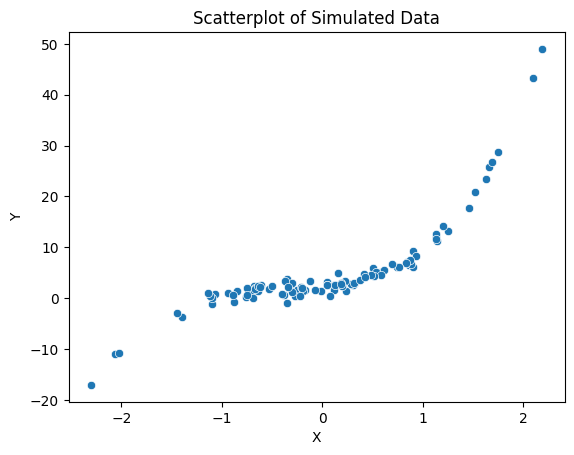

In [20]:
# Construct Y using a nonlinear polynomial relationship plus noise
y = 2 + 2*x + 3*x**2 + 2.5*x**3 + eps

# Visualize the response against X
sns.scatterplot(x=x, y=y)
plt.title("Scatterplot of Simulated Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## (c) Use forward stepwise selection in order to select a model containing the predictors X,X^2,...,X^10. What is the best model obtained according to Cp ? Report the coefficients of the best model obtained. 
- Forward Stepwise Selection using Mallows’ Cp (≈ AIC) 
- Prepare design matrix with polynomial terms X^1 through X^10
- Run forward stepwise selection using AIC
- Extract AIC values and number of predictors
- Plot AIC (Mallows' Cp proxy) vs model size
- Print best model details

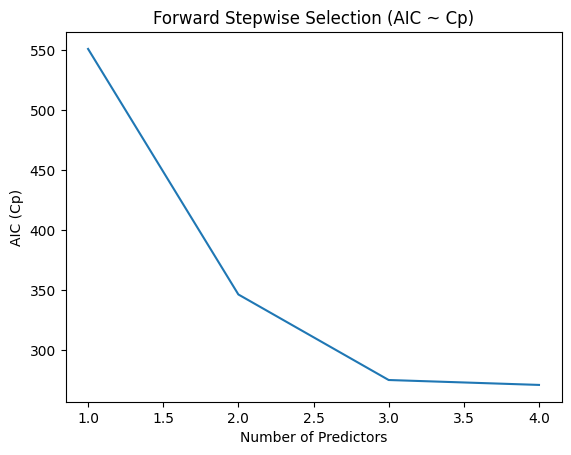

Selected Predictors (Cp): ['X3', 'X2', 'X1', 'X6']
Model Coefficients:
 Intercept    2.276949
X3           2.605378
X2           2.657467
X1           1.910076
X6           0.020949
dtype: float64


In [21]:
 import pandas as pd
 import itertools
 import statsmodels.formula.api as smf
 import seaborn as sns
 import matplotlib.pyplot as plt

# Prepare design matrix with polynomial terms X^1 through X^10
X = pd.DataFrame({f'X{i}': x**i for i in range(1, 11)})
y_df = pd.DataFrame({'y': y})

# Function to fit all k-predictor models
def get_models(k, X, y):
    combos = itertools.combinations(X.columns, k)
    models = []
    for combo in combos:
        formula = 'y ~ ' + ' + '.join(combo)
        model = smf.ols(formula, data=pd.concat([X, y], axis=1)).fit()
        models.append((formula, model))
    return models

# Criteria helpers
min_aic = lambda models: sorted(models, key=lambda tup: tup[1].aic)[0]


def forward_stepwise_cp(X, y):
    """Perform forward stepwise selection using AIC (as Cp proxy)"""
    remaining = list(X.columns)
    selected = []
    current_score = np.inf
    best_models = []

    for i in range(len(X.columns)):
        aic_scores = []
        for predictor in remaining:
            # Try adding each remaining predictor to the current model
            formula = 'y ~ ' + ' + '.join(selected + [predictor])
            model = smf.ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
            aic_scores.append((model.aic, predictor, model))

        # Choose predictor that gives lowest AIC (i.e., best Cp)
        best_aic, best_predictor, best_model = min(aic_scores, key=lambda tup: tup[0])
        if best_aic < current_score:
            selected.append(best_predictor)
            remaining.remove(best_predictor)
            current_score = best_aic
            best_models.append((best_model.aic, selected.copy(), best_model))
        else:
            break  # No improvement → stop selection
    return best_models

# Run forward stepwise selection using AIC
stepwise_results = forward_stepwise_cp(X, y_df)

# Extract AIC values and number of predictors
aic_vals = [res[0] for res in stepwise_results]
num_predictors = list(range(1, len(aic_vals)+1))

# Plot AIC (Mallows' Cp proxy) vs model size
sns.lineplot(x=num_predictors, y=aic_vals)
plt.xlabel("Number of Predictors")
plt.ylabel("AIC (Cp)")
plt.title("Forward Stepwise Selection (AIC ~ Cp)")
plt.show()

# Print best model details
best_cp_model = min(stepwise_results, key=lambda tup: tup[0])
print(f"Selected Predictors (Cp): {best_cp_model[1]}")
print("Model Coefficients:\n", best_cp_model[2].params)

## (d) Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)? 
- Backward Stepwise Selection using Mallows’ Cp (≈ AIC)
- Define function that loops through predictors and (1) try's removing each predictor, (2) chooses model with lowest AIC, and returns best.
- Run backward stepwise selection using AIC
- Plot AIC (Cp) vs model size
- Print best model details

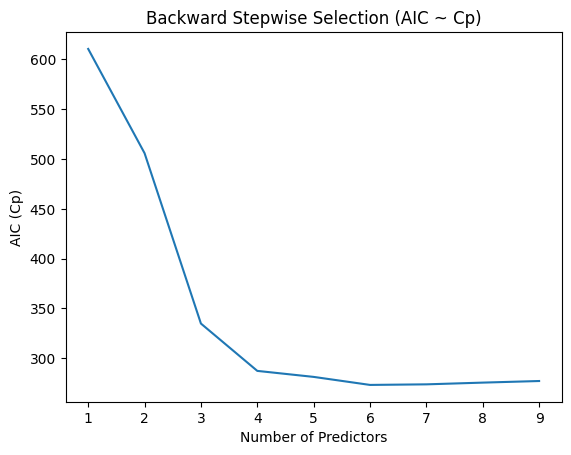

Selected Predictors (Cp): ['X1', 'X2', 'X5', 'X6', 'X7', 'X9']
Model Coefficients:
 Intercept    2.334272
X1           2.716825
X2           2.492363
X5           2.144319
X6           0.031013
X7          -0.614978
X9           0.056794
dtype: float64


In [22]:
def backward_stepwise_cp(X, y):
    """Perform backward stepwise selection using AIC (Cp)"""
    predictors = list(X.columns)
    best_models = []

    while len(predictors) > 0:
        aic_scores = []
        # Try removing each predictor
        for combo in itertools.combinations(predictors, len(predictors) - 1):
            formula = 'y ~ ' + ' + '.join(combo)
            model = smf.ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
            aic_scores.append((model.aic, list(combo), model))

        # Choose model with lowest AIC
        best_aic, best_predictors, best_model = min(aic_scores, key=lambda tup: tup[0])
        best_models.append((best_aic, best_predictors, best_model))

        # Prepare for next iteration
        predictors = best_predictors.copy()
        if len(predictors) == 1:
            break

    return best_models

# Run backward stepwise selection using AIC
backward_results = backward_stepwise_cp(X, y_df)

# Plot AIC (Cp) vs model size
aic_vals_bw = [res[0] for res in backward_results]
num_predictors_bw = list(range(len(aic_vals_bw), 0, -1))  # decreasing order

sns.lineplot(x=num_predictors_bw, y=aic_vals_bw)
plt.xlabel("Number of Predictors")
plt.ylabel("AIC (Cp)")
plt.title("Backward Stepwise Selection (AIC ~ Cp)")
plt.show()

# Print best model details
best_bw_cp_model = min(backward_results, key=lambda tup: tup[0])
print(f"Selected Predictors (Cp): {best_bw_cp_model[1]}")
print("Model Coefficients:\n", best_bw_cp_model[2].params)

## (e) Now fit a lasso model to the simulated data, again using X,X^2,...,X^10 as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the results obtained. 
Lasso with Cross-Validation 
- Standardize predictors with StandardScaler()
- Use LassoCV with 10-fold cross-validation
- Plot MSE vs log(alpha)
- Show selected coefficients

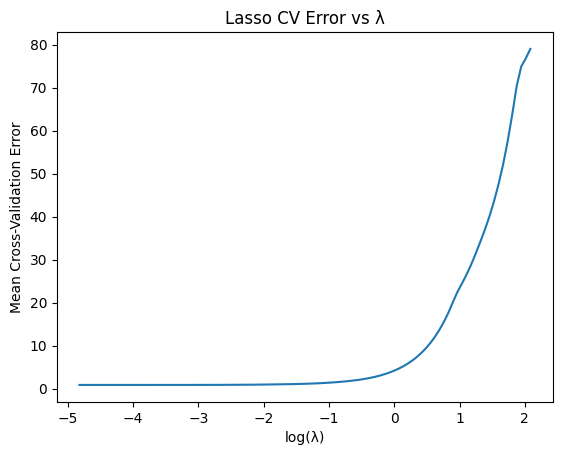

Lasso Coefficients:
 X1    1.691527
X2    2.820691
X3    6.615627
X4    0.395038
X6    0.189316
X9    0.000750
dtype: float64


In [23]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use LassoCV with 10-fold cross-validation
lasso_cv = LassoCV(cv=10, max_iter=1000000)
lasso_cv.fit(X_scaled, y)

# Plot MSE vs log(alpha)
plt.plot(np.log(lasso_cv.alphas_), lasso_cv.mse_path_.mean(axis=1))
plt.xlabel("log(λ)")
plt.ylabel("Mean Cross-Validation Error")
plt.title("Lasso CV Error vs λ")
plt.show()

# Show selected coefficients
lasso_coefs = pd.Series(lasso_cv.coef_, index=X.columns)
print("Lasso Coefficients:\n", lasso_coefs[lasso_coefs != 0])

- Lasso automatically shrinks irrelevant coefficients to zero, performing variable selection.
- We plotted the MSE curve to see how λ affects performance.
- The final printed coefficients are the selected predictors.

## (f) Now generate a response vector Y according to the model 
## Y = $\beta_{0}$ + $\beta_{7}$ $X^7$ + $\epsilon$ , 
## and perform forward stepwise selection and the lasso. Discuss the results obtained. 
New model: Y = β₀ + β₇X⁷ + ε  (Best Subset vs Lasso)
- Generate new Y with only X^7 influencing Y
- Visualize with scatter plot
- Assign subset selection for new Y 
- Find the best model
- Lasso on new Y

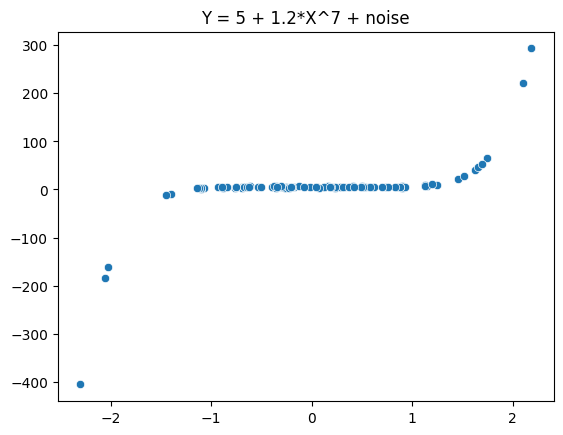

Best Subset Model (new Y): y ~ X7
Intercept    5.154000
X7           1.202545
dtype: float64
Lasso selected predictors (new Y):
 X2     -0.026407
X5      3.283994
X7     53.454227
X9      4.298795
X10     0.156504
dtype: float64


In [24]:
# Generate new Y with only X^7 influencing Y
y_new = 5 + 1.2*(x**7) + eps
y_df_new = pd.DataFrame({'y': y_new})

# Visualize
sns.scatterplot(x=x, y=y_new)
plt.title("Y = 5 + 1.2*X^7 + noise")
plt.show()

# Best subset selection for new Y
best_subset_models = [min_aic(get_models(k, X, y_df_new)) for k in range(1, 11)]

# Find the best model
best_model = min(best_subset_models, key=lambda m: m[1].bic)
print("Best Subset Model (new Y):", best_model[0])
print(best_model[1].params)

# Lasso on new Y
lasso_new = LassoCV(cv=10, max_iter=1000000)
lasso_new.fit(X_scaled, y_new)
lasso_new_coefs = pd.Series(lasso_new.coef_, index=X.columns)
print("Lasso selected predictors (new Y):\n", lasso_new_coefs[lasso_new_coefs != 0])

- Best Subset will identify the correct model (X⁷) if Cp is well-behaved.
- Lasso performs well, especially if λ is appropriately tuned; it tends to shrink small coefficients to zero.
- Cp (AIC) is an effective proxy for model complexity vs fit.